## 1- Load Word2Vec vectors

In [1]:
## First we install gensim package and load Word2Vec model
## Source: https://code.google.com/archive/p/word2vec/ 
## SLIM version, (300k words instead of 3m): https://github.com/eyaler/word2vec-slim

!pip install gensim
import gensim
from gensim.models import Word2Vec
# Load Google's pre-trained Word2Vec model.
model = gensim.models.KeyedVectors.load_word2vec_format('./GoogleW2VModel/GoogleNews-vectors-negative300-SLIM.bin', binary=True)  

You are using pip version 10.0.1, however version 19.0.3 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.
C:\Users\Samir A Ghoudrani\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\utils.py:1212: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [2]:
# Quick tests on Word2Vec
dog = model['dog']
print(dog.shape)
print(dog[:10])
print(model.most_similar(positive=['woman', 'king'], negative=['man']))
print(model.doesnt_match("breakfast cereal dinner lunch".split()))
print(model.similarity('woman', 'man'))
print(model.similarity('add', 'addition'))

(300,)
[ 0.01719806 -0.00749344 -0.05798202  0.05405104 -0.02833585  0.01924545
  0.01965492 -0.02768068 -0.00515942 -0.02129283]
[('queen', 0.7118192911148071), ('monarch', 0.6189674735069275), ('princess', 0.5902431607246399), ('prince', 0.5377322435379028), ('kings', 0.5236844420433044), ('queens', 0.5181134343147278), ('sultan', 0.5098593235015869), ('monarchy', 0.5087411999702454), ('throne', 0.5005807280540466), ('royal', 0.4938204884529114)]
cereal
0.7664013
0.34175575


C:\Users\Samir A Ghoudrani\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [46]:
## Let's assess the size and convert to DF
print(model.vectors.shape) ## (299567, 300)
import pandas as pd
Words_Vectors = pd.DataFrame(model.vectors)
print(Words_Vectors.shape)
Words_Vectors.head()

(299567, 300)
(299567, 300)


,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,0.052956,0.065460,0.066195,0.047072,0.052221,-0.082009,-0.061415,-0.116210,0.015629,0.099293,...,-0.127242,-0.066931,-0.060679,0.048911,0.046153,-0.035672,-0.044314,-0.035856,0.010895,-0.047072
1,-0.008512,-0.034224,0.032284,0.045868,-0.013143,-0.046221,-0.000948,-0.052219,0.046574,0.062451,...,-0.016318,0.002690,-0.059628,0.058923,0.005733,0.000345,0.013319,0.051513,-0.025227,0.017465
2,-0.012361,-0.022230,0.065540,0.039477,-0.086620,0.024913,-0.011163,-0.070522,0.092369,0.092752,...,-0.008863,-0.012265,-0.026254,-0.016193,-0.015235,0.050209,0.015810,0.005390,0.047909,-0.116515
3,0.003746,-0.038920,0.091332,0.012000,-0.070575,0.105343,0.059936,-0.057342,0.038141,0.011092,...,-0.124024,-0.019330,-0.049817,0.097040,0.014400,0.067980,-0.013168,0.005968,0.087180,0.056823
4,0.016681,-0.056670,0.017367,0.127356,0.003885,-0.056366,0.014091,-0.100544,0.082873,0.038085,...,0.016757,-0.017443,0.019271,0.025288,-0.081654,0.051796,0.009826,-0.072819,-0.018357,-0.044179


In [72]:
## Let's get the words list
print(len(model.vocab)) ## 299567
type(model.vocab)
##pd.DataFrame.from_dict(model.vocab, orient='index', columns=['words'])
words = pd.DataFrame.from_dict(model.vocab, orient='index', columns=['words']).index

## Let's check our dataframe of Words (rows) x Word2Vec Coordinates (columns) 
print(Words_Vectors.shape)
Words_Vectors.head()

299567
(299567, 300)


,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,0.052956,0.065460,0.066195,0.047072,0.052221,-0.082009,-0.061415,-0.116210,0.015629,0.099293,...,-0.127242,-0.066931,-0.060679,0.048911,0.046153,-0.035672,-0.044314,-0.035856,0.010895,-0.047072
1,-0.008512,-0.034224,0.032284,0.045868,-0.013143,-0.046221,-0.000948,-0.052219,0.046574,0.062451,...,-0.016318,0.002690,-0.059628,0.058923,0.005733,0.000345,0.013319,0.051513,-0.025227,0.017465
2,-0.012361,-0.022230,0.065540,0.039477,-0.086620,0.024913,-0.011163,-0.070522,0.092369,0.092752,...,-0.008863,-0.012265,-0.026254,-0.016193,-0.015235,0.050209,0.015810,0.005390,0.047909,-0.116515
3,0.003746,-0.038920,0.091332,0.012000,-0.070575,0.105343,0.059936,-0.057342,0.038141,0.011092,...,-0.124024,-0.019330,-0.049817,0.097040,0.014400,0.067980,-0.013168,0.005968,0.087180,0.056823
4,0.016681,-0.056670,0.017367,0.127356,0.003885,-0.056366,0.014091,-0.100544,0.082873,0.038085,...,0.016757,-0.017443,0.019271,0.025288,-0.081654,0.051796,0.009826,-0.072819,-0.018357,-0.044179


## 2- Clustering with SOM

In [44]:
## Let's use Python's Sompy package for SOM: Self-Organised Maps
##!pip install sompy
!pip install git+https://github.com/compmonks/SOMPY.git
!pip install ipdb==0.8.1
import sompy
from sompy.sompy import SOMFactory

%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt

  Cloning https://github.com/compmonks/SOMPY.git to c:\users\samira~1\appdata\local\temp\pip-req-build-k06hxgyw
  Running setup.py bdist_wheel for SOMPY: started
  Running setup.py bdist_wheel for SOMPY: finished with status 'done'
  Stored in directory: C:\Users\SAMIRA~1\AppData\Local\Temp\pip-ephem-wheel-cache-e1o6l5xw\wheels\cc\5f\3e\4c08f1ca381629d98f50c9ba04bd95c9e704dc37ebdf301c1c
Successfully built SOMPY


You are using pip version 10.0.1, however version 19.0.3 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


You are using pip version 10.0.1, however version 19.0.3 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.
CACHEDIR=C:\Users\Samir A Ghoudrani\.matplotlib
Using fontManager instance from C:\Users\Samir A Ghoudrani\.matplotlib\fontList.json
backend module://ipykernel.pylab.backend_inline version unknown
backend module://ipykernel.pylab.backend_inline version unknown
backend module://ipykernel.pylab.backend_inline version unknown


In [51]:
## We define the number of nodes in our SOM map
mapsize = [30,30]

## We build the model, hyperparameters can be tuned for better results
som = sompy.SOMFactory.build(model.vectors, mapsize, mask=None, mapshape='planar', lattice='rect', normalization='var', initialization='pca', neighborhood='gaussian', training='batch', name='sompy')  # this will use the default parameters, but i can change the initialization and neighborhood methods

## We specify and start the training (1 epoch corresponds to a full iteration on all the data)
som.train(n_job=1, verbose='info',train_rough_len=50, train_finetune_len=50)  # verbose='debug' will print more, and verbose=None wont print anything

 Training...
 pca_linear_initialization took: 3.072000 seconds
 Rough training...
 radius_ini: 4.000000 , radius_final: 1.000000, trainlen: 50

 epoch: 1 ---> elapsed time:  7.164000, quantization error: 16.623310

 epoch: 2 ---> elapsed time:  11.037000, quantization error: 16.409815

 epoch: 3 ---> elapsed time:  10.969000, quantization error: 16.222512

 epoch: 4 ---> elapsed time:  10.679000, quantization error: 16.118542

 epoch: 5 ---> elapsed time:  10.583000, quantization error: 16.055971

 epoch: 6 ---> elapsed time:  10.919000, quantization error: 16.017587

 epoch: 7 ---> elapsed time:  11.028000, quantization error: 15.989671

 epoch: 8 ---> elapsed time:  10.367000, quantization error: 15.965078

 epoch: 9 ---> elapsed time:  10.755000, quantization error: 15.943063

 epoch: 10 ---> elapsed time:  10.571000, quantization error: 15.924105

 epoch: 11 ---> elapsed time:  10.559000, quantization error: 15.906906

 epoch: 12 ---> elapsed time:  10.534000, quantization error: 1

In [52]:
## Let's measure the SOM Quality:
topographic_error = som.calculate_topographic_error() ## Quality of the map itself, SOM nodes themselves
quantization_error = np.mean(som._bmu[1]) ## Quality of the affectation of our observations to each node in the SOM map
print('Topographic error = %s; Quantization error = %s' % (topographic_error, quantization_error))

Topographic error = 0.5786451778733973; Quantization error = 14.994304361757571


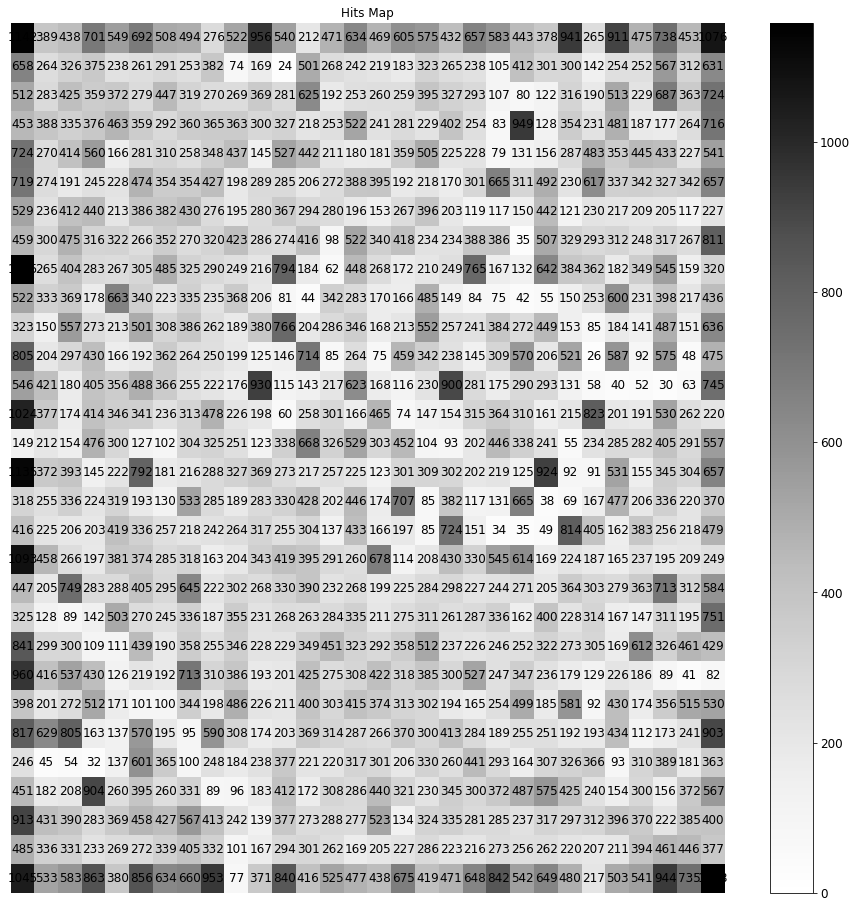

In [53]:
## Hits Map of the number of observations per node: is the map balanced? (homogeneous usage?)
from sompy.visualization.bmuhits import BmuHitsView
vhts  = BmuHitsView(4,4,"Hits Map",text_size=12)
vhts.show(som, anotate=True, onlyzeros=False, labelsize=12, cmap="Greys", logaritmic=False)

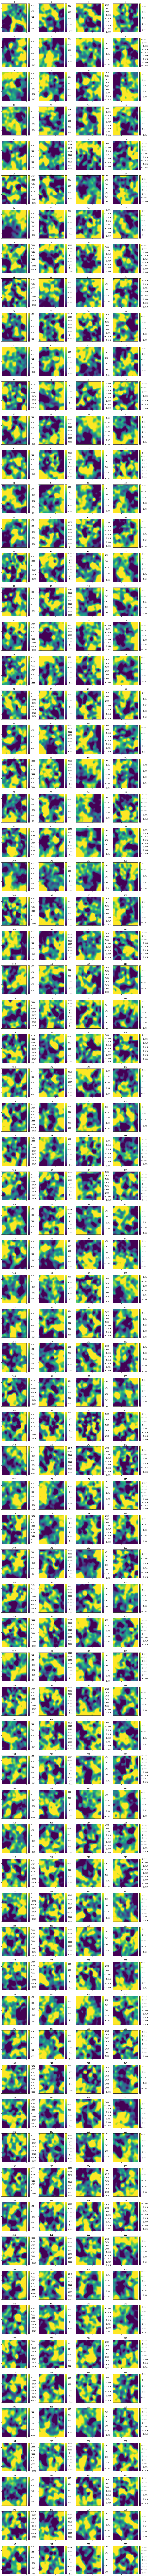

In [56]:
## Let's plot all the windows with the projected heatmap / by dimension
colnames = list(Words_Vectors.columns.values)
som.component_names = colnames
from sompy.visualization.mapview import View2D
view2D  = View2D(10,10,"rand data",text_size=10)
view2D.show(som, col_sz=4, which_dim="all", desnormalize=True)

In [57]:
## Let's do clustering (K-means by default) on top of the trained som
v = sompy.mapview.View2DPacked(2, 2, 'test',text_size=8)  

map_labels = som.cluster(n_clusters=100)
data_labels = np.array([map_labels[int(k)] for k in som._bmu[0]]) # mapping labels from grid to original data
print(data_labels.shape)
data_labels

(299567,)


array([66, 66, 66, ..., 64, 27, 64])

C:\Users\Samir A Ghoudrani\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


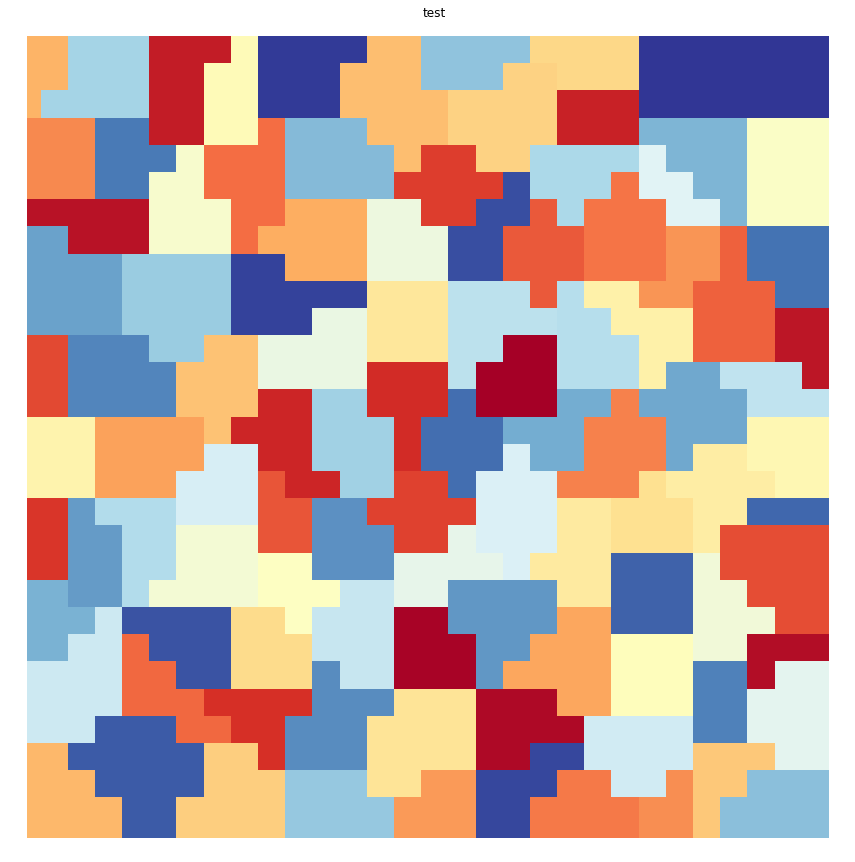

In [58]:
## Visualisation of clusters
v.show(som, what='cluster')

C:\Users\Samir A Ghoudrani\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


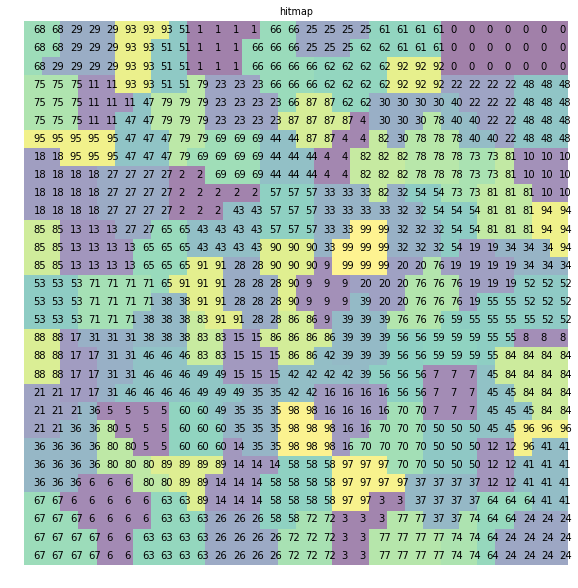

array([[  0,   0,   0],
       [  0,   1,   1],
       [  0,   2,   2],
       ...,
       [ 29,  27, 897],
       [ 29,  28, 898],
       [ 29,  29, 899]])

In [59]:
## Visualisation of cluster IDs on top of the SOM map
h = sompy.hitmap.HitMapView(10, 10, 'hitmap', text_size=8, show_text=True)
h.show(som)

In [63]:
## Let's build the mapping: Word - Cluster (2 column DF)
len(words) ## 299567
len(data_labels) ## 299567

words_in_clusters = pd.DataFrame(np.column_stack([words, data_labels]), 
                               columns=['Word', 'Cluster'])

words_in_clusters

299567

## 3- Do the clusters make sense? (see infographic)

In [86]:
## Now let's check our clusters!
## Do they make sense?
## Let's look into each cluster and try to figure out what it is about:
Cluster_to_look_into = 25
## Important to keep in mind: the order of words here is still the Google model's order 
## (by frequency in common language use) 
words_in_clusters[words_in_clusters['Cluster']==Cluster_to_look_into]

## We can now try all values from 0 to Number_clusters!
## =============> Results in the infographic in this repository :)

,Word,Cluster
271,case,25
321,court,25
379,law,25
525,order,25
853,legal,25
908,common,25
948,required,25
951,evidence,25
969,filed,25
1022,claims,25
